In [1]:
%pip install sqlalchemy psycopg2-binary pandas python-dotenv "elasticsearch==8.7.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.9/387.9 kB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
# !pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB ? eta 0:00:000:00:0100:13
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 1.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 766.9 kB/s eta 0:00:000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:0000:0100:01�━━━━━━━━━━━━━╺

In [2]:
!pip show sentence-transformers

Name: sentence-transformers
Version: 3.2.1
Summary: State-of-the-Art Text Embeddings
Home-page: 
Author: 
Author-email: Nils Reimers <info@nils-reimers.de>, Tom Aarsen <tom.aarsen@huggingface.co>
License: Apache 2.0
Location: /opt/conda/lib/python3.8/site-packages
Requires: huggingface-hub, Pillow, scikit-learn, scipy, torch, tqdm, transformers
Required-by: 


### Funcionalidades

Nuestro sistema es capaz de gestionar las siguientes funcionalidades:
- Tendencias en los videos
- Tendencias en los comentarios
- Búsqueda de videos similares
- Búsqueda de comentarios similares 
- Búsqueda de comentarios positivos dado un tema
- Consultas externas enlazadas con wikidata y dbpedia (Hechas de manera externa en SparQL) 

#### Tendencias
Gracias a los datos que hemos almacenado en el sistema, es posible obtener:
- Las tendencias de likes por visitas de los videos de cada canal junto con la duración de los vídeos de cada canal.
- Las franjas horarias en las cuales es mejor publicar videos.
- Las épocas del año en las cuales es mejor publicar videos ya que se obtiene unas mejores métricas. 
- Los canales con una tendencia de comentarios positivos.

In [9]:

import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
from typing import Optional



# --- Config DB ---
DB_HOST = os.getenv("PGHOST", "postgres")   # 'postgres' si estás en el mismo docker network; 'localhost' si ejecutas fuera
DB_PORT = int(os.getenv("PGPORT", "5432"))
DB_NAME = os.getenv("PGDATABASE", "bbdd_api_youtube")
DB_USER = os.getenv("PGUSER", "postgres")
DB_PASS = os.getenv("PGPASSWORD", "postgres")

engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

def run_query(sql: str, params: Optional[dict] = None) -> pd.DataFrame:
    with engine.connect() as conn:
        df = pd.read_sql(text(sql), conn, params=params)
    return df

print(f"Conectando a {DB_NAME}@{DB_HOST}:{DB_PORT} como {DB_USER} ... listo.")


Conectando a bbdd_api_youtube@postgres:5432 como postgres ... listo.


**Tendencias de los vídeos**

Filas: 7


,channel,avg_dur_min,avg_likes,avg_comments,ratio_likes,ratio_comments
0,Mathologer,24.46,15846.13,1484.18,0.001544,0.016480
1,El Traductor de Ingeniería,22.29,16791.13,514.00,0.001327,0.043366
2,3Blue1Brown,15.01,95621.25,2191.34,0.000157,0.006850
3,QuantumFracture,10.99,76055.05,1890.27,0.000145,0.005814
4,Veritasium,10.96,206185.49,10329.51,0.000053,0.001061
5,ElectroBOOM,7.97,155205.37,3774.71,0.000051,0.002111
6,BBC Timestamp,6.61,2024.00,187.19,0.003266,0.035312


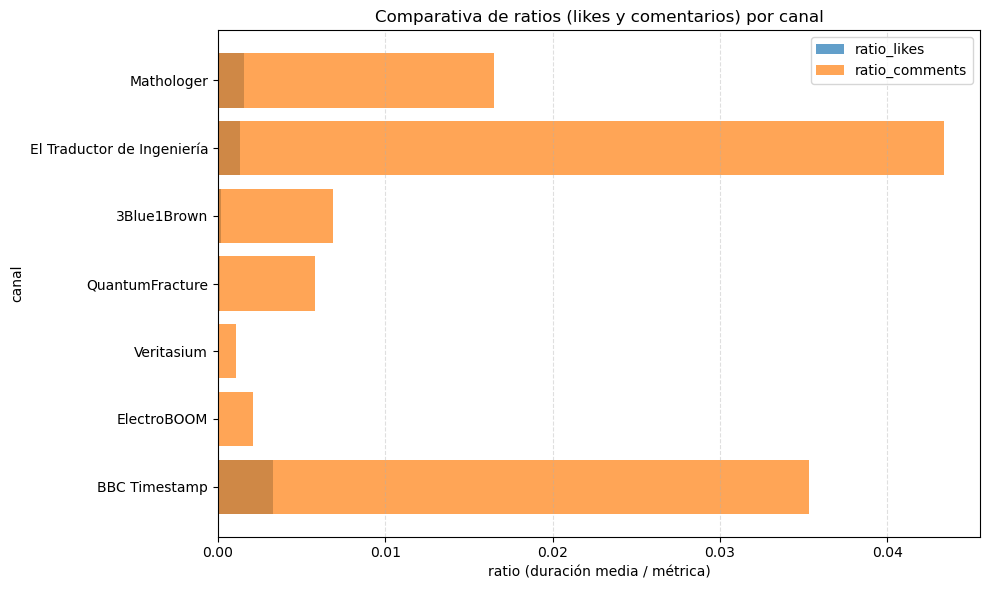

In [25]:

sql_1 = """
-- con los ratios de comments y likes por duración de video
WITH per_channel_base AS (
  SELECT
    c.name AS channel,
    ROUND((AVG(v.duration)::float / 60.0)::numeric, 2) AS avg_dur_min,
    ROUND((AVG(v.like_count)::float)::numeric, 2)      AS avg_likes,
    ROUND((AVG(v.comment_count)::float)::numeric, 2)   AS avg_comments
  FROM public.video v
  JOIN public.channel c ON c.id = v.id_channel
  WHERE v.duration IS NOT NULL
    AND v.like_count IS NOT NULL
    AND v.comment_count IS NOT NULL
  GROUP BY c.name
),
per_channel AS (
  SELECT
    channel,
    avg_dur_min,
    avg_likes,
    avg_comments,
    avg_dur_min / NULLIF(avg_likes,0)    AS ratio_likes,
    avg_dur_min / NULLIF(avg_comments,0) AS ratio_comments
  FROM per_channel_base
)
SELECT *
FROM per_channel
ORDER BY avg_dur_min DESC;
"""
df_ratios = run_query(sql_1)
print("Filas:", len(df_ratios))
display(df_ratios.head(20))


# ordenar por duración media
df_top = df_ratios.sort_values("avg_dur_min", ascending=False).head(15)

# gráfica combinada
plt.figure(figsize=(10, 6))
plt.barh(df_top["channel"], df_top["ratio_likes"], color="#1f77b4", alpha=0.7, label="ratio_likes")
plt.barh(df_top["channel"], df_top["ratio_comments"], color="#ff7f0e", alpha=0.7, label="ratio_comments")

plt.title("Comparativa de ratios (likes y comentarios) por canal")
plt.xlabel("ratio (duración media / métrica)")
plt.ylabel("canal")
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Épocas del año en donde es mejor publicar**

Filas: 14


<Figure size 1000x500 with 0 Axes>

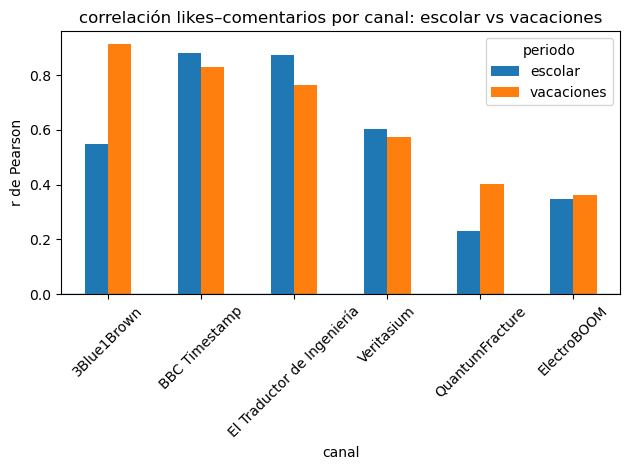

In [14]:

sql_2 = """
WITH base AS (
  SELECT
    c.name                       AS channel,
    v.like_count::float          AS likes,
    v.comment_count::float       AS comments,
    CASE
      WHEN EXTRACT(MONTH FROM v.published_at) IN (7,8) THEN 'vacaciones'
      ELSE 'escolar'
    END                          AS periodo
  FROM public.video v
  JOIN public.channel c ON c.id = v.id_channel
  WHERE v.like_count IS NOT NULL
    AND v.comment_count IS NOT NULL
    AND v.published_at IS NOT NULL
)
SELECT
  channel,
  periodo,
  ROUND((corr(likes, comments))::numeric,3)  AS r_pearson,
  COUNT(*)               AS n
FROM base
GROUP BY channel, periodo
HAVING COUNT(*) >= 5           -- mínimo tamaño muestral
ORDER BY channel, periodo;
"""
df_corr = run_query(sql_2)
print("Filas:", len(df_corr))
#display(df_corr.head(30))


min_n = 20  # cámbialo si quieres
both = (df_corr
        .query("periodo in ['escolar','vacaciones']")
        .copy())

# filtro por n mínimo por periodo
both = both[both["n"] >= min_n]

# 2) Pivot a columnas por periodo (r_pearson como valor)
pv_r = (both
        .pivot_table(index="channel", columns="periodo", values="r_pearson", aggfunc="first")
        .dropna(subset=["escolar","vacaciones"])
        )

# 3) (Opcional) ordena por mayor |r| en cualquiera de los dos periodos y limita a top N
topN = 20
order_idx = (pv_r.abs().max(axis=1)).sort_values(ascending=False).index[:topN]
pv_top = pv_r.loc[order_idx]

# 4) Grafica barras agrupadas (mismo eje para escolar y vacaciones)
plt.figure(figsize=(10,5))
pv_top.plot(kind="bar", rot=45)
plt.title("correlación likes–comentarios por canal: escolar vs vacaciones")
plt.xlabel("canal")
plt.ylabel("r de Pearson")
plt.axhline(0, linewidth=1)
plt.tight_layout()
plt.show()



**Mejores franjas horarias para publicar**

In [ ]:
sql_franjas = """
WITH base AS (
  SELECT
    v.id,
    v.like_count,
    v.comment_count,
    /* Ajusta si tu published_at NO está en UTC */
    ((v.published_at AT TIME ZONE 'UTC') AT TIME ZONE 'Europe/Madrid') AS published_local
  FROM public.video v
  WHERE v.published_at IS NOT NULL
)
SELECT
  CASE
    WHEN EXTRACT(HOUR FROM published_local) BETWEEN 0  AND 5  THEN '00-06'
    WHEN EXTRACT(HOUR FROM published_local) BETWEEN 6  AND 11 THEN '06-12'
    WHEN EXTRACT(HOUR FROM published_local) BETWEEN 12 AND 17 THEN '12-18'
    ELSE '18-24'
  END AS franja_horaria,

  COUNT(*) AS num_videos,

  ROUND((AVG((like_count::float) / NULLIF(comment_count, 0)))::numeric, 2) AS avg_likes_por_comentario,
  ROUND(STDDEV_SAMP((like_count::float) / NULLIF(comment_count, 0))::numeric, 2) AS sd_likes_por_comentario,

  ROUND(AVG(like_count::float)::numeric, 2)    AS avg_likes,
  ROUND(STDDEV_SAMP(like_count::float)::numeric, 2) AS sd_likes,

  ROUND(AVG(comment_count::float)::numeric, 2) AS avg_comments,
  ROUND(STDDEV_SAMP(comment_count::float)::numeric, 2) AS sd_comments

FROM base
GROUP BY franja_horaria
ORDER BY franja_horaria;
"""

df_franjas = run_query(sql_franjas)
print("Filas:", len(df_franjas))
display(df_franjas)


Filas: 4


,franja_horaria,num_videos,avg_likes_por_comentario,sd_likes_por_comentario,avg_likes,sd_likes,avg_comments,sd_comments
0,00-06,190,49.329360,56.590537,82007.831579,221613.220894,2122.915789,3803.005456
1,06-12,80,39.419072,52.721181,74857.662500,227693.078327,2456.812500,5298.124113
2,12-18,836,57.990259,74.625693,105156.526316,181161.871010,4096.500000,8597.602148
3,18-24,1043,48.619548,62.080286,102355.788111,195951.453209,3651.576222,8075.825592


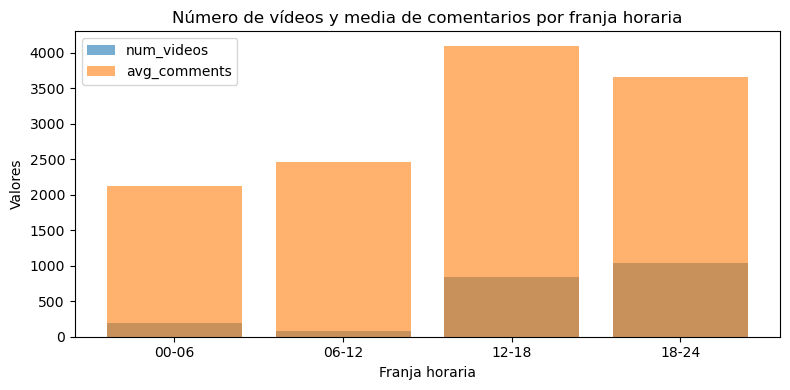

In [27]:
fig, ax = plt.subplots(figsize=(8,4))

# primera serie
ax.bar(
    df_franjas["franja_horaria"],
    df_franjas["num_videos"],
    label="num_videos",
    alpha=0.6
)

# segunda serie
ax.bar(
    df_franjas["franja_horaria"],
    df_franjas["avg_comments"],
    label="avg_comments",
    alpha=0.6
)

ax.set_title("Número de vídeos y media de comentarios por franja horaria")
ax.set_xlabel("Franja horaria")
ax.set_ylabel("Valores")
ax.legend()
plt.tight_layout()
plt.show()


**Tendencias del número de likes en los comentarios por canal** 

Filas devueltas: 5


,channel,r_pearson,n
0,QuantumFracture,0.026,10565
1,BBC Timestamp,0.018,2833
2,Mathologer,0.009,2234
3,3Blue1Brown,0.008,4470
4,Veritasium,0.002,9002


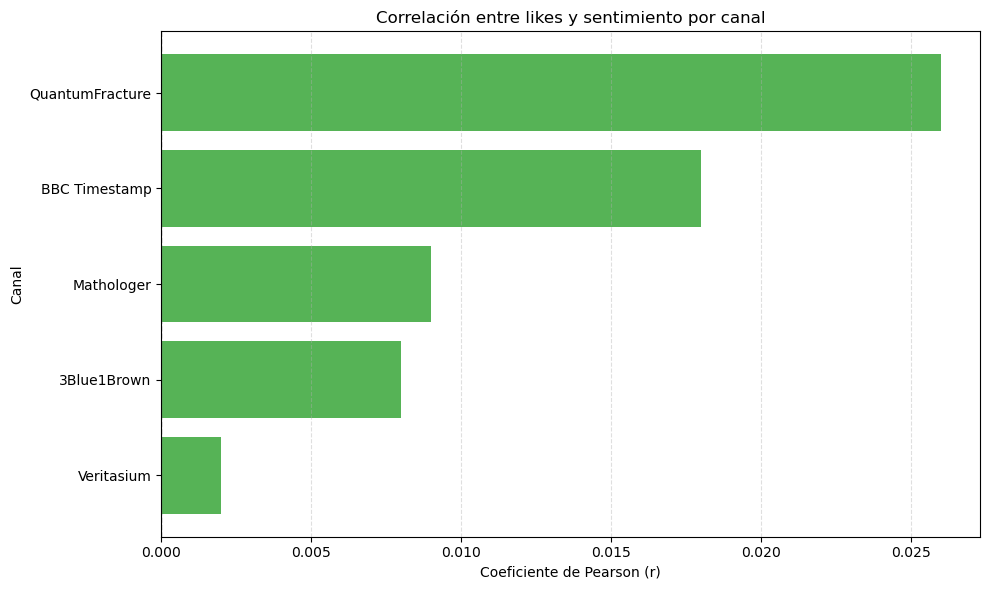

In [26]:
# Consulta SQL: correlación likes–sentimiento por canal
sql_sentiment_corr = """
SELECT
  ch.name AS channel,
  ROUND(corr(cm.like_count::float, cm.sentiment_score::float)::numeric, 3) AS r_pearson,
  COUNT(*) AS n
FROM public.comment cm
JOIN public.video v  ON v.id = cm.id_video
JOIN public.channel ch ON ch.id = v.id_channel
WHERE cm.like_count IS NOT NULL
  AND cm.sentiment_score IS NOT NULL
GROUP BY ch.name
HAVING COUNT(*) >= 30
ORDER BY r_pearson DESC;
"""

# Ejecutar consulta
df_sentiment = run_query(sql_sentiment_corr)
print("Filas devueltas:", len(df_sentiment))
display(df_sentiment.head(15))

# --- Gráfica de correlación por canal ---
import matplotlib.pyplot as plt

# seleccionar los 20 canales con mayor correlación (positiva o negativa)
df_plot = df_sentiment.sort_values("r_pearson", ascending=False).head(20)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_plot["channel"], df_plot["r_pearson"],
                color=["#2ca02c" if r > 0 else "#d62728" for r in df_plot["r_pearson"]],
                alpha=0.8)

plt.title("Correlación entre likes y sentimiento por canal")
plt.xlabel("Coeficiente de Pearson (r)")
plt.ylabel("Canal")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


#### Búsqueda de videos similares

Primero lo hacemos solo por similitud entre contenidos y después por militud coseno usando embeddings para demostrar que el sistema permite llevar a cabo ambas búsquedas si el usuario lo desea.

In [3]:
from elasticsearch import Elasticsearch
import pandas as pd

es = Elasticsearch("http://elasticsearch:9200")
print(es.info().body["version"])

{'number': '8.7.0', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '09520b59b6bc1057340b55750186466ea715e30e', 'build_date': '2023-03-27T16:31:09.816451435Z', 'build_snapshot': False, 'lucene_version': '9.5.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}


**Búsqueda de videos por similitud de contenidos**

In [4]:

## Busqueda de aquellos videos mas similares a un nuevo video con un topic nuevo dandole el doble de peso a los titulos 

def similares_por_contenido(title: str, topic_or_desc: str, size: int = 10):
    q = {
        "size": size,
        "_source": ["id","title_raw","topic","language","duration_seconds",
                    "view_count","like_count","published_at","id_channel"],
        "query": {
            "multi_match": {
                "query": f"{title}\n{topic_or_desc or ''}",
                "fields": ["title_raw^2","topic"],  # pesa más el título
                "type": "best_fields"
            }
        }
    }
    res = es.search(index="videos", body=q)
    rows = [{"score": h["_score"], **h["_source"]} for h in res["hits"]["hits"]]
    return pd.DataFrame(rows)

df = similares_por_contenido("Introducción a matrices", "álgebra lineal, operaciones básicas", size=15)
df.head()

/tmp/ipykernel_648/592911459.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="videos", body=q)


,score,id,title_raw,duration_seconds,topic,published_at,view_count,like_count,language,id_channel
0,15.016190,3hCJILOpvWA,🚀Circuitos ELÉCTRICOS: Introducción al Régimen...,925,"This are the details of a youtube video, gener...",2025-08-24T20:21:59,17405,1171,es-419,UCa6V1UVOXN4wDm7RDQDoa6g
1,12.562542,e5NDNgCfVs8,📚 ¡MATEMÁTICA sin MEMORIZAR! - Clase #2: Opera...,5480,"This are the details of a youtube video, gener...",2024-03-10T08:55:35,207876,9131,es-419,UCa6V1UVOXN4wDm7RDQDoa6g
2,11.367714,kYB8IZa5AuE,Linear transformations and matrices | Chapter ...,659,"3blue1brown is a channel about animating math,...",2016-08-07T21:39:19,6271357,133201,en-US,UCYO_jab_esuFRV4b17AJtAw
3,10.921768,HtWh2S5L0A8,📖 Luego del Reto Viral 8:2*(2+2) ¿JERARQUÍA DE...,653,No summary avaliable,2019-08-11T01:30:08,152344,10136,es-419,UCa6V1UVOXN4wDm7RDQDoa6g
4,10.377901,v8VSDg_WQlA,Nonsquare matrices as transformations between ...,267,No summary avaliable,2016-08-16T21:59:23,1849382,33610,en-US,UCYO_jab_esuFRV4b17AJtAw


**Búsqueda de videos similares usando embeddings**

In [5]:
from sentence_transformers import SentenceTransformer

def similares_por_contenido(title: str, topic_or_desc: str = "", size: int = 10):
    # Cargar el modelo de sentence-transformers
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Combinar título y topic/descripción para la consulta
    query_text = f"{title} {topic_or_desc}" if topic_or_desc else title
    
    # Generar el embedding para el texto de consulta
    query_embedding = model.encode([query_text])[0].tolist()
    
    # Buscar videos similares usando knn
    query = {
        "knn": {
            "field": "title_embedding",
            "query_vector": query_embedding,
            "k": size,
            "num_candidates": 100
        },
        "_source": ["id", "title_raw", "topic", "language", "duration_seconds",
                   "view_count", "like_count", "published_at", "id_channel"]
    }
    
    res = es.search(
        index="videos",
        body=query,
        size=size
    )
    
    rows = [{"score": h["_score"], **h["_source"]} for h in res["hits"]["hits"]]
    return pd.DataFrame(rows)

# Ejemplo de uso
df = similares_por_contenido("Introducción a matrices", "álgebra lineal, operaciones básicas", size=15)
df.head()

/opt/conda/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipykernel_648/3488675039.py:25: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(


,score,id,title_raw,duration_seconds,topic,published_at,view_count,like_count,language,id_channel
0,0.786194,Ip3X9LOh2dk,"The determinant | Chapter 6, Essence of linear...",603,"3blue1brown is a channel about animating math,...",2016-08-10T22:31:18,4453029,97837,en-US,UCYO_jab_esuFRV4b17AJtAw
1,0.784768,XkY2DOUCWMU,Matrix multiplication as composition | Chapter...,604,No summary avaliable,2016-08-08T22:20:43,3892855,80327,en-US,UCYO_jab_esuFRV4b17AJtAw
2,0.764902,kYB8IZa5AuE,Linear transformations and matrices | Chapter ...,659,"3blue1brown is a channel about animating math,...",2016-08-07T21:39:19,6271357,133201,en-US,UCYO_jab_esuFRV4b17AJtAw
3,0.758695,TgKwz5Ikpc8,"Abstract vector spaces | Chapter 16, Essence o...",1006,"3blue1brown is a channel about animating math,...",2016-09-24T19:29:09,1621181,57233,en-US,UCYO_jab_esuFRV4b17AJtAw
4,0.748643,uQhTuRlWMxw,"Inverse matrices, column space and null space ...",729,"3blue1brown is a channel about animating math,...",2016-08-15T22:00:22,3425897,70835,en-US,UCYO_jab_esuFRV4b17AJtAw


**Consulta de youtube, buscar una serie de palabras (topic) y obtener los videos mas parecidos usando embeddings**

In [10]:
# Cargar el modelo una sola vez
_model_st = SentenceTransformer('all-MiniLM-L6-v2')

def similares_por_topic(topic_text: str, size: int = 10,
                        channel_id: Optional[str] = None,
                        language: Optional[str] = None):
    """
    Devuelve los vídeos más similares a un 'topic' usando kNN sobre 'topic_embedding'.
    Opcionalmente filtra por canal (id_channel) y/o idioma (language).
    """
    query_vec = _model_st.encode([topic_text])[0].tolist()

    knn = {
        "field": "topic_embedding",
        "query_vector": query_vec,
        "k": size,
        "num_candidates": max(100, size * 5)
    }

    must_filters = []
    if channel_id:
        must_filters.append({"term": {"id_channel": channel_id}})
    if language:
        must_filters.append({"term": {"language": language}})
    if must_filters:
        knn["filter"] = {"bool": {"must": must_filters}}

    body = {
        "knn": knn,
        "_source": [
            "id","title_raw","topic","language","duration_seconds",
            "view_count","like_count","published_at","id_channel"
        ]
    }

    res = es.search(index="videos", body=body, size=size)
    hits = res.get("hits", {}).get("hits", [])

    # Fallback BM25 si no hay embeddings o resultados
    if not hits:
        body_fallback = {
            "size": size,
            "_source": [
                "id","title_raw","topic","language","duration_seconds",
                "view_count","like_count","published_at","id_channel"
            ],
            "query": {
                "multi_match": {
                    "query": topic_text,
                    "fields": ["topic^2","description","title_raw"],
                    "type": "best_fields"
                }
            }
        }
        res = es.search(index="videos", body=body_fallback)
        hits = res.get("hits", {}).get("hits", [])

    rows = [{"id": h["_id"], "score": h["_score"], **h["_source"]} for h in hits]
    return pd.DataFrame(rows)

Se pueden buscar vídeos similares en general, vídeos similares de un canal en específico o vídeos similares en un idioma específico.

In [22]:
# similares por topic (sin filtros)
df = similares_por_topic("álgebra lineal, matrices, determinantes", size=15)
print("\n  Resultados generales (topic: Álgebra lineal, matrices, determinantes)")
print(df[["id", "score", "title_raw"]]
      .to_string(index=False, justify="left", col_space=15, max_colwidth=None))

# filtrando al mismo canal
df_can = similares_por_topic("circuitos eléctricos en transitorio", size=12, channel_id="UCa6V1UVOXN4wDm7RDQDoa6g")
print("\n Resultados filtrados por un canal (topic: circuitos eléctricos)")
print(df_can[["id", "score", "title_raw"]]
      .to_string(index=False, justify="left", col_space=15, max_colwidth=None))

# filtrando por idioma
df_es = similares_por_topic("derivadas y reglas de cálculo", size=10, language="es-419")
print("\n  Resultados en español (topic: Derivadas y reglas de cálculo)")
print(df_es[["id", "score", "title_raw"]]
      .to_string(index=False, justify="left", col_space=15, max_colwidth=None))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_648/1694375546.py:36: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="videos", body=body, size=size)
2025-11-12 11:23:04,818 - INFO - POST http://elasticsearch:9200/videos/_search [status:200 duration:0.111s]



  Resultados generales (topic: Álgebra lineal, matrices, determinantes)
id               score          title_raw                                                                                      
Ip3X9LOh2dk     0.853140                                                 The determinant | Chapter 6, Essence of linear algebra
eu6i7WJeinw     0.751812                                                 Cross products | Chapter 10, Essence of linear algebra
kYB8IZa5AuE     0.745048                             Linear transformations and matrices | Chapter 3, Essence of linear algebra
rHLEWRxRGiM     0.744154                        Three-dimensional linear transformations | Chapter 5, Essence of linear algebra
fNk_zzaMoSs     0.734761                                                         Vectors | Chapter 1, Essence of linear algebra
BaM7OCEm3G0     0.734316          Cross products in the light of linear transformations | Chapter 11, Essence of linear algebra
kjBOesZCoqc     0.732546       

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_648/1694375546.py:36: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="videos", body=body, size=size)
2025-11-12 11:23:05,236 - INFO - POST http://elasticsearch:9200/videos/_search [status:200 duration:0.274s]



 Resultados filtrados por un canal (topic: circuitos eléctricos)
id               score          title_raw                                                             
kHZ8SD7jiiA     0.765294                             CIRCUITOS ELÉCTRICOS, pero SIN memorizar fórmulas
HonwOVt0zvo     0.760820                                 Circuitos en Alterna - Fasores | El Traductor
qKZvC8rpcsA     0.758695           🚀Circuitos ELÉCTRICOS: GUÍA para resolver (casi) cualquier CIRCUITO
GLXTCCyjLvc     0.757785                                  CIRCUITOS ELÉCTRICOS: 4 Circuitos IMPOSIBLES
sho9Qqr4-Gs     0.756490                Circuitos en Alterna - Inductores y Capacitores | El Traductor
23zivMuTxwE     0.754664        🔴 EN VIVO - Clase Práctica: Circuitos Eléctricos Básicos en Ingeniería
btrxWydp4ag     0.738009         🚀Circuitos ELÉCTRICOS: Leyes de Kirchhoff y Resistencias Equivalentes
-rcYsgMbVwo     0.736911                El ABC de los Circuitos Eléctricos - Ley de Ohm | El Traductor
tpt9FlN

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipykernel_648/1694375546.py:36: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="videos", body=body, size=size)
2025-11-12 11:23:05,419 - INFO - POST http://elasticsearch:9200/videos/_search [status:200 duration:0.029s]



  Resultados en español (topic: Derivadas y reglas de cálculo)
id               score          title_raw                                                                           
_6-zwdrqD3U     0.771586                                                        DERIVADAS: Clase Completa desde Cero
O6PeN5SJxzk     0.755912                                                    DERIVADAS: Las Famosas Reglas EXPLICADAS
MdKOjS8-oNw     0.741028                                                         ECUACIONES DIFERENCIALES desde cero
0HATT2N4bG8     0.736977                                          Reto 5 y 6 - Respondo al video de @QuantumFracture
atcL96btyG0     0.733702                                                                Respondo a @QuantumFracture​
6UesXY1376w     0.724834                                        SEÑALES Y SISTEMAS - Parte 1: Señales | El Traductor
x078DTRvs9U     0.721928                                                    📚 Desde CERO: Clase de Integrales DOBLES


#### Búsqueda de comentarios similares 

El sistema permite tanto buscar comentarios similares en un video que se hayan detectado que son similares como con comentarios en general

**Búsqueda de comentarios similares en videos similares usando similitud de contenido**

In [13]:
def similares_en_canal(video_id, size=10):
    doc = es.get(index="videos", id=video_id)["_source"]
    q = {
        "size": size,
        "_source": ["id","id_channel","title_raw","topic","language","duration_seconds","view_count","like_count","published_at"],
        "query": {
            "bool": {
                "filter": [{"term": {"id_channel": doc["id_channel"]}}],
                "should": [
                    {"match": {"topic": doc.get("topic","")}},
                    {"match": {"title_raw": {"query": doc.get("title_raw",""), "boost": 2}}}
                ],
                "minimum_should_match": 1
            }
        }
    }
    res = es.search(index="videos", body=q)
    vids = [h["_id"] for h in res["hits"]["hits"] if h["_id"] != video_id]
    df = pd.DataFrame([{**h["_source"], "id_video": h["_id"], "_score": h["_score"]} for h in res["hits"]["hits"]])
    return vids, df

def _comentarios_de_video(video_id, max_docs=50):
    q = {
        "size": max_docs,
        "_source": ["id","id_video","text","published_at","like_count","sentiment_score"],
        "query": {"term": {"id_video": video_id}}
    }
    res = es.search(index="comments", body=q)
    return [h["_source"]["text"] for h in res["hits"]["hits"] if h["_source"].get("text")]

def comentarios_similares_entre_videos_similares(video_id, size=50, semillas_max=80, candidatos_por_video=200):
    # 1) vídeos similares
    similar_ids, df_videos = similares_en_canal(video_id, size=10)
    if not similar_ids:
        return pd.DataFrame(), df_videos

    # 2) semillas: comentarios del vídeo origen (varios textos)
    semillas = _comentarios_de_video(video_id, max_docs=semillas_max)
    if not semillas:  # si el vídeo no tiene comentarios, usa título+tema como “semilla”
        vsrc = es.get(index="videos", id=video_id)["_source"]
        semillas = [f"{vsrc.get('title_raw','')} {vsrc.get('topic','')}"]

    # 3) búsqueda MLT en comments, filtrando por vídeos similares
    q = {
        "size": size,
        "_source": ["id","id_video","text","published_at","like_count","sentiment_score"],
        "query": {
            "bool": {
                "filter": [{"terms": {"id_video": similar_ids}}],
                "must": {
                    "more_like_this": {
                        "fields": ["text"],
                        "like": [{"doc": {"text": t}} for t in semillas],
                        "min_term_freq": 1,
                        "min_doc_freq": 1,
                        "max_query_terms": 50
                    }
                }
            }
        }
    }
    res = es.search(index="comments", body=q)
    rows = []
    for h in res["hits"]["hits"]:
        src = h["_source"]
        rows.append({
            "score": h["_score"],
            "comment_id": src.get("id"),
            "id_video": src.get("id_video"),
            "text": src.get("text"),
            "published_at": src.get("published_at"),
            "like_count": src.get("like_count"),
            "sentiment_score": src.get("sentiment_score"),
        })
    df_comentarios = pd.DataFrame(rows)

    return df_comentarios, df_videos

def comentarios_similares_a_un_comentario(comment_id, size=50):
    # semilla: el propio comentario
    c = es.get(index="comments", id=comment_id)["_source"]
    video_id = c["id_video"]

    # vídeos similares al del comentario
    similar_ids, df_videos = similares_en_canal(video_id, size=10)
    if not similar_ids:
        return pd.DataFrame(), df_videos

    q = {
        "size": size,
        "_source": ["id","id_video","text","published_at","like_count","sentiment_score"],
        "query": {
            "bool": {
                "filter": [{"terms": {"id_video": similar_ids}}],
                "must": {
                    "more_like_this": {
                        "fields": ["text"],
                        "like": [{"_index": "comments", "_id": comment_id}],
                        "min_term_freq": 1,
                        "min_doc_freq": 1,
                        "max_query_terms": 50
                    }
                },
                "must_not": [{"term": {"_id": comment_id}}]
            }
        }
    }
    res = es.search(index="comments", body=q)
    rows = [{
        "score": h["_score"],
        "comment_id": h["_source"]["id"],
        "id_video": h["_source"]["id_video"],
        "text": h["_source"]["text"],
        "published_at": h["_source"].get("published_at"),
        "like_count": h["_source"].get("like_count"),
        "sentiment_score": h["_source"].get("sentiment_score"),
    } for h in res["hits"]["hits"]]
    return pd.DataFrame(rows), df_videos


In [21]:
df_comments, df_videos = comentarios_similares_a_un_comentario("UgyBUfIkQCf8wvDoTux4AaABAg")


/tmp/ipykernel_121/3987778047.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="videos", body=q)
/tmp/ipykernel_121/3987778047.py:108: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index="comments", body=q)


In [23]:
print("COMENTARIOS SIMILARES:")
display(df_comments)

print("VIDEOS SIMILARES:")
display(df_videos_similares)

COMENTARIOS SIMILARES:


,score,comment_id,id_video,text,published_at,like_count,sentiment_score
0,18.583420,Ugyia5gVnU7BgBLe7YR4AaABAg,ESveYNa4OMk,"HEEE !!!! un momento ,,,los planetas son esfe...",2025-06-14,0,5
1,14.539654,UgwjlO77r2MR-yGRbvV4AaABAg,wmvZbyOCFd4,Hola amigo tengo 2 tesis que demuestran 2 movi...,2025-08-17,0,3
2,13.038719,Ugx2gQWUWc7HCnhZQjR4AaABAg,5WZb_xCX2KQ,Es importante informarse bien sobre el tema co...,2024-10-30,0,3
3,12.874792,UgzzQ5agp4IY-HmWRIZ4AaABAg,5WZb_xCX2KQ,El horóscopo que crees que eres no es ya que e...,2024-11-23,1,2
4,12.552361,UgyzEr-mmicypgQRXD14AaABAg,G6A_Zh7lpoM,2:15 Pues si ya no se pueden usar telescopios ...,2025-04-28,0,3
5,10.629751,UgwFPaprmVDpZw3Lhbd4AaABAg,iExj0mk1Wno,"No es solo azul. Por la noche es negro, si tie...",2025-04-16,0,2
6,10.526012,UgwFdFVWMKcYa7FwODZ4AaABAg,pqEidVW9da0,Y la semana que viene resolveremos de una vez ...,2021-05-23,4268,3
7,10.157432,UgyEGrWiuJl78p_IXWp4AaABAg,ESveYNa4OMk,Pero cómo pueden curvarse conceptos humanos lo...,2025-07-02,0,2
8,9.963725,UgzhT6wGP4DyGgWDKfJ4AaABAg,5WZb_xCX2KQ,La astrología es mucho más compleja que este v...,2024-09-09,0,2
9,9.679243,UgxDzhVy9wj5Vv5ir8J4AaABAg,5WZb_xCX2KQ,"La astrologia tiene sus defectos sin duda, por...",2025-07-13,0,1


VIDEOS SIMILARES:


,id,title_raw,duration_seconds,topic,published_at,view_count,like_count,language,id_channel,id_video,_score
0,4tgOyU34D44,How To See Air Currents,392,How To See Air Currents,2017-06-15T12:00:00,1592695,81465,en,UCHnyfMqiRRG1u-2MsSQLbXA,4tgOyU34D44,86.473740
1,kh9OmFBg8qI,How To See Atoms,64,How To See Atoms,2025-10-17T13:00:04,8331413,215342,en,UCHnyfMqiRRG1u-2MsSQLbXA,kh9OmFBg8qI,40.347180
2,w5ebcowAJD8,I built a QR code with my bare hands to see ho...,2113,I built a QR code with my bare hands to see ho...,2024-09-30T18:51:21,8868808,267777,en,UCHnyfMqiRRG1u-2MsSQLbXA,w5ebcowAJD8,25.596764
3,ovJcsL7vyrk,This equation will change how you see the worl...,1119,This equation will change how you see the worl...,2020-01-29T19:35:46,16721868,604056,en,UCHnyfMqiRRG1u-2MsSQLbXA,ovJcsL7vyrk,20.770393
4,PifL8bAybyc,How To Make Graphene,221,How To Make Graphene,2011-12-19T10:35:12,2686578,57034,en,UCHnyfMqiRRG1u-2MsSQLbXA,PifL8bAybyc,20.528822
5,q6WlXhtVvkg,How to solve any maze,176,How to solve any maze,2025-09-18T13:00:02,6961711,332671,en,UCHnyfMqiRRG1u-2MsSQLbXA,q6WlXhtVvkg,19.398207
6,h830G5mkTF4,How To Solve a Quadratic Equation,154,How To Solve a Quadratic Equation,2025-10-26T13:32:19,3312303,109796,en,UCHnyfMqiRRG1u-2MsSQLbXA,h830G5mkTF4,18.389645
7,Q51-gLL_MRM,How To Earthquake-Proof A House,1143,How To Earthquake-Proof A House,2023-12-19T15:16:53,2288501,78045,en,UCHnyfMqiRRG1u-2MsSQLbXA,Q51-gLL_MRM,18.389645
8,knDIENvBTgw,How to Launch a Nuclear Missile,461,How to Launch a Nuclear Missile,2015-07-27T15:00:02,4961345,125139,en,UCHnyfMqiRRG1u-2MsSQLbXA,knDIENvBTgw,18.389645
9,zNzzGgr2mhk,How To Make a Quantum Bit,471,How To Make a Quantum Bit,2013-07-23T15:16:32,1780939,45974,en,UCHnyfMqiRRG1u-2MsSQLbXA,zNzzGgr2mhk,18.389645


**Búsqueda de comentarios similares usando embeddings**

#### Búsqueda de comentarios positivos dado un tema

---